# Алгоритм Дойча-Йоджа для решения задачи.

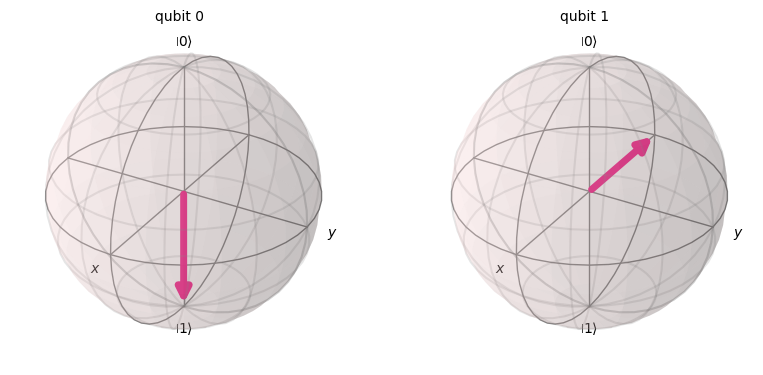

In [ ]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector

# Создание квантовой схемы с 2 кубитами и 1 классическим битом
qc = QuantumCircuit(2, 1)

# Состояние послепднего кубита должно быть равно |1>
qc.x(1)

# применяем адмара к первому и второму кубиту
qc.h(0)
qc.h(1)

# функция b(x)
def b(x: QuantumCircuit):
    x.cx(0, 1)

def c(x: QuantumCircuit):
    x.x(1)

b(qc)

# 
qc.h(0)
qc.save_statevector()
qc.measure(0, 0)

# Симуляция схемы
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

state = result.get_statevector()

plot_bloch_multivector(state)

In [52]:
result.get_counts()

{'1': 1024}

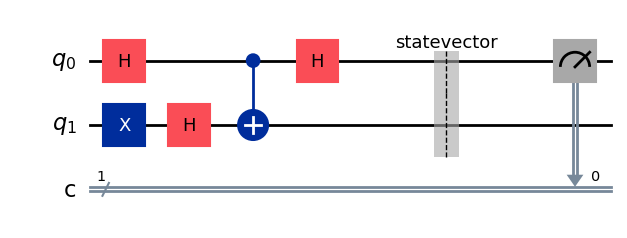

In [53]:
# Визуализация схемы и гистограммы
qc.draw(output='mpl')